In [45]:
from IPython.display import display, clear_output
import math
import numpy as np
from PIL import Image
import vapory

In [40]:
def create_scene(moment, is_box):
    angle = 2 * math.pi * moment / 360
    r_camera = 10
    camera = vapory.Camera('location', [r_camera * math.cos(angle), 1.5, r_camera * math.sin(angle)], 
                           'look_at', [0.0, 0.0, 0.0], 
                           'angle', 30)
    light1 = vapory.LightSource([2, 4, -3], 'color', [1, 1, 1], 'shadowless')
    light2 = vapory.LightSource([2, 4, 3], 'color', [1, 1, 1], 'shadowless')
    plane = vapory.Plane([0, 1, 0], -2, vapory.Pigment('color', [1, 1, 1]))
    box = vapory.Box([-1, -1, -1], [1, 1, 1], 
                     vapory.Pigment('Col_Glass_Clear'),
                     vapory.Finish('F_Glass9'),
                     vapory.Interior('I_Glass1'))
    sphere = vapory.Sphere( [0, 0, 0], 1 + (math.sqrt(2) - 1) / 2, vapory.Texture(vapory.Pigment('color', [0.7, 0.7, 0.7])))
    some_shape = box if is_box else sphere
    return vapory.Scene(camera, objects=[light1, light2, plane, some_shape], included=['glass.inc'])

In [47]:
n = 360
ds = np.zeros((2 * n, 100, 100, 3), dtype=np.uint8)

In [48]:
for t in range(720):
    scene = create_scene(t / 2, is_box=t%2 == 0)
    pic = scene.render(width=100, height=100)
    ds[t] = pic
    clear_output()
    display(t)  # Image.fromarray(pic))

719

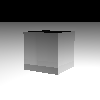

In [67]:
Image.fromarray(ds[600])

In [68]:
np.savez('box_sphere', ds=ds)